In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

How the data is labeled...



FTHG: Full Time Home Goals

FTAG: Full Time Away Goals

FTR: Full Time Result (H=Home Win, D=Draw, A=Away Win) <-- This is what we want to predict!

HST: Home Shots on Target

AST: Away Shots on Target

HC: Home Corners

AC: Away Corners

In [4]:

# all of the prem data for 24/25 season
data = pd.read_csv('E0.csv')

In [5]:
print('Data Loaded Successfully!')
print(data.head())

Data Loaded Successfully!
  Div        Date   Time    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  16/08/2024  20:00  Man United       Fulham     1     0   H     0     0   
1  E0  17/08/2024  12:30     Ipswich    Liverpool     0     2   A     0     0   
2  E0  17/08/2024  15:00     Arsenal       Wolves     2     0   H     1     0   
3  E0  17/08/2024  15:00     Everton     Brighton     0     3   A     0     1   
4  E0  17/08/2024  15:00   Newcastle  Southampton     1     0   H     1     0   

   ... B365CAHH B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  AvgCAHA  \
0  ...     1.86     2.07   1.83   2.11     1.88     2.11     1.82     2.05   
1  ...     2.05     1.88   2.04   1.90     2.20     2.00     1.99     1.88   
2  ...     2.02     1.91   2.00   1.90     2.05     1.93     1.99     1.87   
3  ...     1.87     2.06   1.86   2.07     1.92     2.10     1.83     2.04   
4  ...     1.87     2.06   1.88   2.06     1.89     2.10     1.82     2.05   

   BFECAHH  BFECAH

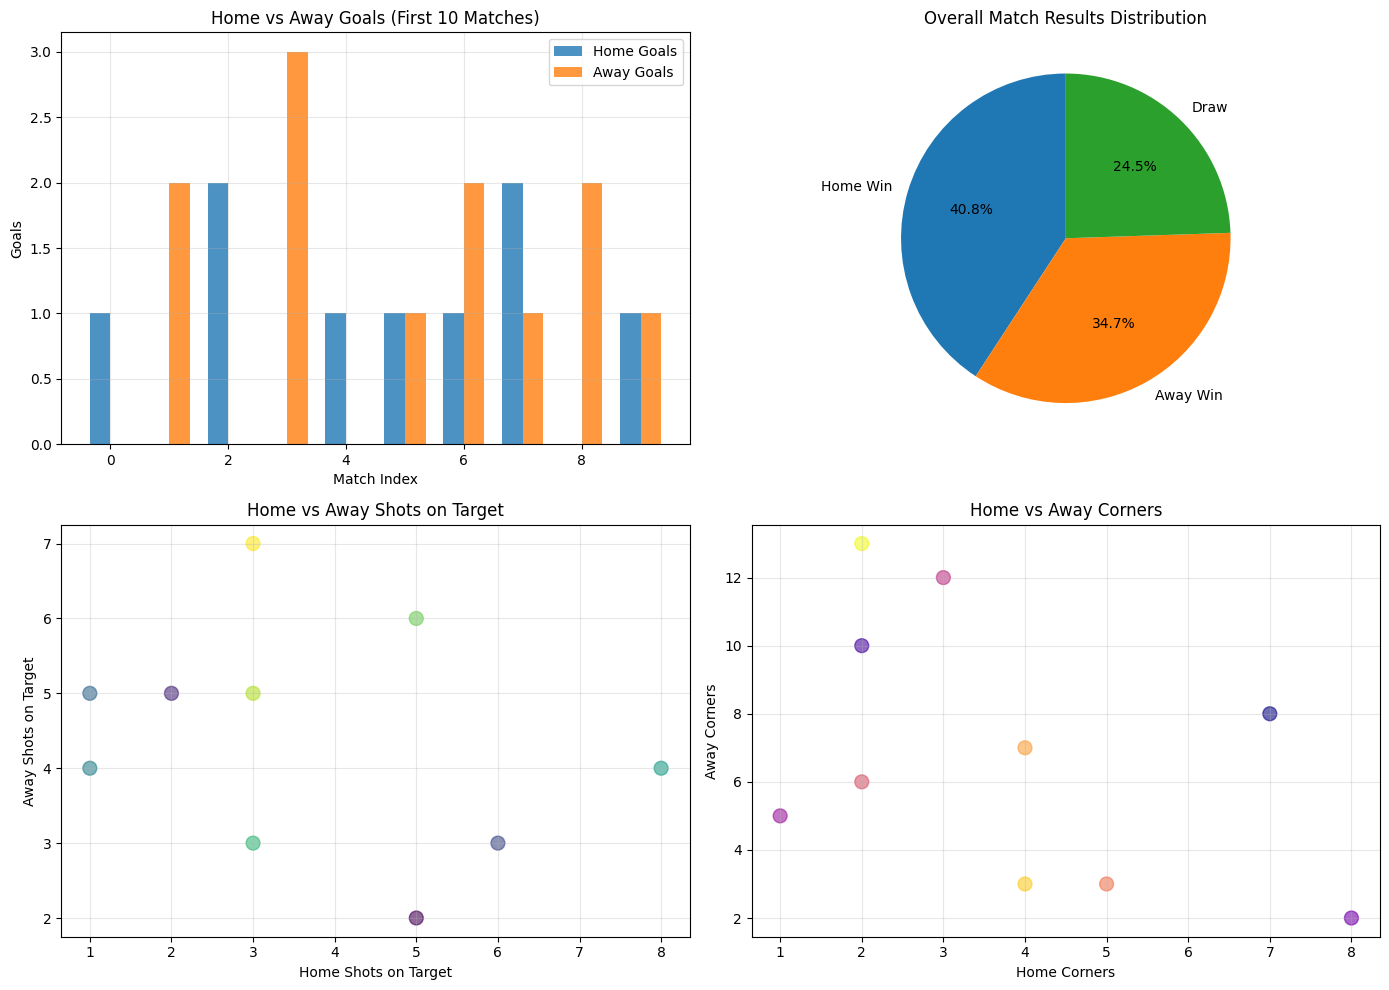


First 10 matches:
        HomeTeam        AwayTeam  FTHG  FTAG FTR  HST  AST  HC  AC
0     Man United          Fulham     1     0   H    5    2   7   8
1        Ipswich       Liverpool     0     2   A    2    5   2  10
2        Arsenal          Wolves     2     0   H    6    3   8   2
3        Everton        Brighton     0     3   A    1    5   1   5
4      Newcastle     Southampton     1     0   H    1    4   3  12
5  Nott'm Forest     Bournemouth     1     1   D    8    4   2   6
6       West Ham     Aston Villa     1     2   A    3    3   5   3
7      Brentford  Crystal Palace     2     1   H    5    6   4   7
8        Chelsea        Man City     0     2   A    3    5   4   3
9      Leicester       Tottenham     1     1   D    3    7   2  13


In [6]:
# Select a subset of important features to visualize
subset = data[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HST', 'AST', 'HC', 'AC']].head(10)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Goals comparison for first 10 matches
ax1 = axes[0, 0]
x = range(len(subset))
width = 0.35
ax1.bar([i - width/2 for i in x], subset['FTHG'], width, label='Home Goals', alpha=0.8)
ax1.bar([i + width/2 for i in x], subset['FTAG'], width, label='Away Goals', alpha=0.8)
ax1.set_xlabel('Match Index')
ax1.set_ylabel('Goals')
ax1.set_title('Home vs Away Goals (First 10 Matches)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Match results distribution
ax2 = axes[0, 1]
result_counts = data['FTR'].value_counts()
ax2.pie(result_counts, labels=['Home Win', 'Away Win', 'Draw'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Overall Match Results Distribution')

# 3. Shots on Target comparison
ax3 = axes[1, 0]
ax3.scatter(subset['HST'], subset['AST'], s=100, alpha=0.6, c=subset.index, cmap='viridis')
ax3.set_xlabel('Home Shots on Target')
ax3.set_ylabel('Away Shots on Target')
ax3.set_title('Home vs Away Shots on Target')
ax3.grid(True, alpha=0.3)

# 4. Corners comparison
ax4 = axes[1, 1]
ax4.scatter(subset['HC'], subset['AC'], s=100, alpha=0.6, c=subset.index, cmap='plasma')
ax4.set_xlabel('Home Corners')
ax4.set_ylabel('Away Corners')
ax4.set_title('Home vs Away Corners')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display first 10 rows with key columns
print("\nFirst 10 matches:")
print(subset.to_string())

In [7]:
# we need to separate the data into two parts...
# Feature: shots, corners, fouls, etc...
# Target: win, loss, or 

feature_list = [
    'HST', 'AST', 'HS', 'AS',  # Shots
    'HC', 'AC',  # Corners
    'HF', 'AF',  # Fouls
    'HY', 'AY',  # Yellow cards
    'B365H', 'B365D', 'B365A',  # Betting odds (important!)
    'HTHG', 'HTAG'  # Half-time goals
]

features = data[feature_list]
targets = data['FTR']

In [8]:
# break up the training data and the testing data

feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=0.2, random_state=67)

In [9]:
# make the model
model = RandomForestClassifier(
    n_estimators=200, # how many trees
    max_depth=10, # to prevent overfitting
    random_state=67,
    class_weight='balanced'

)

In [10]:
# train the model
model.fit(feature_train, target_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [11]:
# Make predictions on the test set
predictions = model.predict(feature_test)

# Check accuracy
accuracy = accuracy_score(target_test, predictions)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 63.16%



--- Feature Importance ---
   Feature  Importance
10   B365H    0.092466
0      HST    0.091956
12   B365A    0.091061
1      AST    0.085692
3       AS    0.072705
2       HS    0.068309
11   B365D    0.065028
5       AC    0.064163
7       AF    0.061535
13    HTHG    0.060086
6       HF    0.059283
4       HC    0.052215
9       AY    0.047794
8       HY    0.044632
14    HTAG    0.043075


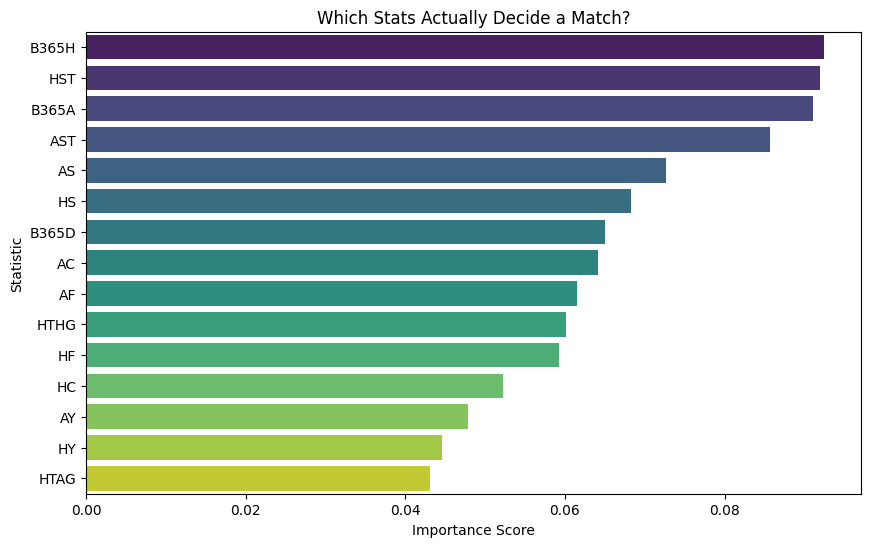

In [12]:

# 1. Get the "Importance" scores from the model
importances = model.feature_importances_

# 2. Match the scores with the column names so we know what is what
feature_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
})

# 3. Sort them so the most important one is at the top
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# 4. Print the list to the console
print("\n--- Feature Importance ---")
print(feature_df)

# 5. Make a pretty bar chart
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', hue='Feature', data=feature_df, palette='viridis', legend=False)
plt.title('Which Stats Actually Decide a Match?')
plt.xlabel('Importance Score')
plt.ylabel('Statistic')
plt.show()
